In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa import stattools as st
from scipy import stats
from arch.unitroot import ADF
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS
from statsmodels.tsa.api import VAR
import statsmodels.api as sm
import os

In [2]:
path='C:/Users/user/Desktop/AllData期貨價(合併)/'
TVIX = pd.read_excel(path+'1120TVIX.xlsx').dropna(axis = 0, how = 'any')
CallATM0CloseF = pd.read_excel(path+'CallATM0CloseF.xlsx').dropna(axis = 0, how = 'any') #1
CallATM0NextF = pd.read_excel(path+'CallATM0NextF.xlsx').dropna(axis = 0, how = 'any') #2
CallOTM1CloseF = pd.read_excel(path+'CallOTM1CloseF.xlsx').dropna(axis = 0, how = 'any') #3
CallOTM1NextF = pd.read_excel(path+'CallOTM1NextF.xlsx').dropna(axis = 0, how = 'any') #4
CallOTM2CloseF = pd.read_excel(path+'CallOTM2CloseF.xlsx').dropna(axis = 0, how = 'any') #5
CallOTM2NextF = pd.read_excel(path+'CallOTM2NextF.xlsx').dropna(axis = 0, how = 'any') #6
CallOTM3CloseF = pd.read_excel(path+'CallOTM3CloseF.xlsx').dropna(axis = 0, how = 'any') #7
CallOTM3NextF = pd.read_excel(path+'CallOTM3NextF.xlsx').dropna(axis = 0, how = 'any') #8
CallOTM4CloseF = pd.read_excel(path+'CallOTM4CloseF.xlsx').dropna(axis = 0, how = 'any') #9
CallOTM4NextF = pd.read_excel(path+'CallOTM4NextF.xlsx').dropna(axis = 0, how = 'any') #10
CallITM1CloseF = pd.read_excel(path+'CallITM1CloseF.xlsx').dropna(axis = 0, how = 'any') #11
CallITM1NextF = pd.read_excel(path+'CallITM1NextF.xlsx').dropna(axis = 0, how = 'any') #12
CallITM2CloseF = pd.read_excel(path+'CallITM2CloseF.xlsx').dropna(axis = 0, how = 'any') #13
CallITM2NextF = pd.read_excel(path+'CallITM2NextF.xlsx').dropna(axis = 0, how = 'any') #14
CallITM3CloseF = pd.read_excel(path+'CallITM3CloseF.xlsx').dropna(axis = 0, how = 'any') #15
CallITM3NextF = pd.read_excel(path+'CallITM3NextF.xlsx').dropna(axis = 0, how = 'any') #16
CallITM4CloseF = pd.read_excel(path+'CallITM4CloseF.xlsx').dropna(axis = 0, how = 'any') #17
CallITM4NextF = pd.read_excel(path+'CallITM4NextF.xlsx').dropna(axis = 0, how = 'any') #18

PutATM0CloseF = pd.read_excel(path+'PutATM0CloseF.xlsx').dropna(axis = 0, how = 'any') #19
PutATM0NextF = pd.read_excel(path+'PutATM0NextF.xlsx').dropna(axis = 0, how = 'any') #20
PutOTM1CloseF = pd.read_excel(path+'PutOTM1CloseF.xlsx').dropna(axis = 0, how = 'any') #21
PutOTM1NextF = pd.read_excel(path+'PutOTM1NextF.xlsx').dropna(axis = 0, how = 'any') #22
PutOTM2CloseF = pd.read_excel(path+'PutOTM2CloseF.xlsx').dropna(axis = 0, how = 'any') #23
PutOTM2NextF = pd.read_excel(path+'PutOTM2NextF.xlsx').dropna(axis = 0, how = 'any') #24
PutOTM3CloseF = pd.read_excel(path+'PutOTM3CloseF.xlsx').dropna(axis = 0, how = 'any') #25
PutOTM3NextF = pd.read_excel(path+'PutOTM3NextF.xlsx').dropna(axis = 0, how = 'any') #26
PutOTM4CloseF = pd.read_excel(path+'PutOTM4CloseF.xlsx').dropna(axis = 0, how = 'any') #27
PutOTM4NextF = pd.read_excel(path+'PutOTM4NextF.xlsx').dropna(axis = 0, how = 'any') #28
PutITM1CloseF = pd.read_excel(path+'PutITM1CloseF.xlsx').dropna(axis = 0, how = 'any') #29
PutITM1NextF = pd.read_excel(path+'PutITM1NextF.xlsx').dropna(axis = 0, how = 'any') #30
PutITM2CloseF = pd.read_excel(path+'PutITM2CloseF.xlsx').dropna(axis = 0, how = 'any') #31
PutITM2NextF = pd.read_excel(path+'PutITM2NextF.xlsx').dropna(axis = 0, how = 'any') #32
PutITM3CloseF = pd.read_excel(path+'PutITM3CloseF.xlsx').dropna(axis = 0, how = 'any') #33
PutITM3NextF = pd.read_excel(path+'PutITM3NextF.xlsx').dropna(axis = 0, how = 'any') #34
PutITM4CloseF = pd.read_excel(path+'PutITM4CloseF.xlsx').dropna(axis = 0, how = 'any') #35
PutITM4NextF = pd.read_excel(path+'PutITM4NextF.xlsx').dropna(axis = 0, how = 'any') #36






In [3]:
TVIX.head()

,Date,Close
0,2007/12/18,34.82
1,2007/12/19,28.98
2,2007/12/20,31.17
3,2007/12/21,31.88
4,2007/12/24,32.84


In [4]:
d_TVIX=np.log(TVIX['Close']).diff()

In [5]:
d_TVIX

0            NaN
1      -0.183586
2       0.072850
3       0.022523
4       0.029668
          ...   
3187    0.026766
3188    0.028085
3189    0.037069
3190   -0.056902
3191   -0.017617
Name: Close, Length: 3192, dtype: float64

In [7]:
'''
d_CallATM0CloseF=np.log(CallATM0CloseF['Close']).diff()
d_CallATM0NextF=np.log(CallATM0NextF['Close']).diff()
d_CallOTM1CloseF=np.log(CallOTM1CloseF['Close']).diff()
d_CallOTM1NextF=np.log(CallOTM1NextF['Close']).diff()
d_CallOTM2CloseF=np.log(CallOTM2CloseF['Close']).diff()
d_CallOTM2NextF=np.log(CallOTM2NextF['Close']).diff()
d_CallOTM3CloseF=np.log(CallOTM3CloseF['Close']).diff()
d_CallOTM3NextF=np.log(CallOTM3NextF['Close']).diff()
d_CallOTM4CloseF=np.log(CallOTM4CloseF['Close']).diff()
d_CallOTM4NextF=np.log(CallOTM4NextF['Close']).diff()
d_CallITM1CloseF=np.log(CallITM1CloseF['Close']).diff()
d_CallITM1NextF=np.log(CallITM1NextF['Close']).diff()
d_CallITM2CloseF=np.log(CallITM2CloseF['Close']).diff()
d_CallITM2NextF=np.log(CallITM2NextF['Close']).diff()
d_CallITM3CloseF=np.log(CallITM3CloseF['Close']).diff()
d_CallITM3NextF=np.log(CallITM3NextF['Close']).diff()
d_CallITM4CloseF=np.log(CallITM4CloseF['Close']).diff()
d_CallITM4NextF=np.log(CallITM4NextF['Close']).diff()

d_PutATM0CloseF=np.log(PutATM0CloseF['Close']).diff()
d_PutATM0NextF=np.log(PutATM0NextF['Close']).diff()
d_PutOTM1CloseF=np.log(PutOTM1CloseF['Close']).diff()
d_PutOTM1NextF=np.log(PutOTM1NextF['Close']).diff()
d_PutOTM2CloseF=np.log(PutOTM2CloseF['Close']).diff()
d_PutOTM2NextF=np.log(PutOTM2NextF['Close']).diff()
d_PutOTM3CloseF=np.log(PutOTM3CloseF['Close']).diff()
d_PutOTM3NextF=np.log(PutOTM3NextF['Close']).diff()
d_PutOTM4CloseF=np.log(PutOTM4CloseF['Close']).diff()
d_PutOTM4NextF=np.log(PutOTM4NextF['Close']).diff()
d_PutITM1CloseF=np.log(PutITM1CloseF['Close']).diff()
d_PutITM1NextF=np.log(PutITM1NextF['Close']).diff()
d_PutITM2CloseF=np.log(PutITM2CloseF['Close']).diff()
d_PutITM2NextF=np.log(PutITM2NextF['Close']).diff()
d_PutITM3CloseF=np.log(PutITM3CloseF['Close']).diff()
d_PutITM3NextF=np.log(PutITM3NextF['Close']).diff()
d_PutITM4CloseF=np.log(PutITM4CloseF['Close']).diff()
d_PutITM4NextF=np.log(PutITM4NextF['Close']).diff()
'''

"\nd_CallATM0CloseF=np.log(CallATM0CloseF['Close']).diff()\nd_CallATM0NextF=np.log(CallATM0NextF['Close']).diff()\nd_CallOTM1CloseF=np.log(CallOTM1CloseF['Close']).diff()\nd_CallOTM1NextF=np.log(CallOTM1NextF['Close']).diff()\nd_CallOTM2CloseF=np.log(CallOTM2CloseF['Close']).diff()\nd_CallOTM2NextF=np.log(CallOTM2NextF['Close']).diff()\nd_CallOTM3CloseF=np.log(CallOTM3CloseF['Close']).diff()\nd_CallOTM3NextF=np.log(CallOTM3NextF['Close']).diff()\nd_CallOTM4CloseF=np.log(CallOTM4CloseF['Close']).diff()\nd_CallOTM4NextF=np.log(CallOTM4NextF['Close']).diff()\nd_CallITM1CloseF=np.log(CallITM1CloseF['Close']).diff()\nd_CallITM1NextF=np.log(CallITM1NextF['Close']).diff()\nd_CallITM2CloseF=np.log(CallITM2CloseF['Close']).diff()\nd_CallITM2NextF=np.log(CallITM2NextF['Close']).diff()\nd_CallITM3CloseF=np.log(CallITM3CloseF['Close']).diff()\nd_CallITM3NextF=np.log(CallITM3NextF['Close']).diff()\nd_CallITM4CloseF=np.log(CallITM4CloseF['Close']).diff()\nd_CallITM4NextF=np.log(CallITM4NextF['Close'

In [6]:
CallATM0CloseF.head()

,Date,Close
0,2007/12/18,0.377382
1,2007/12/19,0.339749
2,2007/12/20,0.343128
3,2007/12/21,0.361869
4,2007/12/24,0.355039


In [7]:
data1 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallATM0CloseF.set_index('Date').rename(columns = {'Close': 'CallATM0CloseF_Close'})], 
                 join = 'inner', axis = 1)

data2 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallATM0NextF.set_index('Date').rename(columns = {'Close': 'CallATM0NextF_Close'})], 
                 join = 'inner', axis = 1)

data3 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallOTM1CloseF.set_index('Date').rename(columns = {'Close': 'CallOTM1CloseF_Close'})], 
                 join = 'inner', axis = 1)

data4 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallOTM1NextF.set_index('Date').rename(columns = {'Close': 'CallOTM1NextF_Close'})], 
                 join = 'inner', axis = 1)

data5 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallOTM2CloseF.set_index('Date').rename(columns = {'Close': 'CallOTM2CloseF_Close'})], 
                 join = 'inner', axis = 1)

data6 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallOTM2NextF.set_index('Date').rename(columns = {'Close': 'CallOTM2NextF_Close'})], 
                 join = 'inner', axis = 1)

data7 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallOTM3CloseF.set_index('Date').rename(columns = {'Close': 'CallOTM3CloseF_Close'})], 
                 join = 'inner', axis = 1)

data8 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallOTM3NextF.set_index('Date').rename(columns = {'Close': 'CallOTM3NextF_Close'})], 
                 join = 'inner', axis = 1)

data9 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallOTM4CloseF.set_index('Date').rename(columns = {'Close': 'CallOTM4CloseF_Close'})], 
                 join = 'inner', axis = 1)

data10 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallOTM4NextF.set_index('Date').rename(columns = {'Close': 'CallOTM4NextF_Close'})], 
                 join = 'inner', axis = 1)

data11 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallITM1CloseF.set_index('Date').rename(columns = {'Close': 'CallITM1CloseF_Close'})], 
                 join = 'inner', axis = 1)

data12 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallITM1NextF.set_index('Date').rename(columns = {'Close': 'CallITM1NextF_Close'})], 
                 join = 'inner', axis = 1)

data13 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallITM2CloseF.set_index('Date').rename(columns = {'Close': 'CallITM2CloseF_Close'})], 
                 join = 'inner', axis = 1)

data14 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallITM2NextF.set_index('Date').rename(columns = {'Close': 'CallITM2NextF_Close'})], 
                 join = 'inner', axis = 1)

data15 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallITM3CloseF.set_index('Date').rename(columns = {'Close': 'CallITM3CloseF_Close'})], 
                 join = 'inner', axis = 1)

data16 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallITM3NextF.set_index('Date').rename(columns = {'Close': 'CallITM3NextF_Close'})], 
                 join = 'inner', axis = 1)

data17 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallITM4CloseF.set_index('Date').rename(columns = {'Close': 'CallITM4CloseF_Close'})], 
                 join = 'inner', axis = 1)

data18 = pd.concat([TVIX.set_index('Date').rename(columns = {'Close': 'TVIX_Close'}), 
                  CallITM4NextF.set_index('Date').rename(columns = {'Close': 'CallITM4NextF_Close'})], 
                 join = 'inner', axis = 1)

data1.head()

,TVIX_Close,CallATM0CloseF_Close
Date,,
2007/12/18,34.82,0.377382
2007/12/19,28.98,0.339749
2007/12/20,31.17,0.343128
2007/12/21,31.88,0.361869
2007/12/24,32.84,0.355039


In [8]:
data1["d_CallATM0CloseF_Close"] = np.log(data1['CallATM0CloseF_Close']).diff()
data1["d_TVIX_Close"]= np.log(data1['TVIX_Close']).diff()

data2["d_TVIX_Close"]= np.log(data2['TVIX_Close']).diff()
data2["d_CallATM0NextF_Close"] = np.log(data2['CallATM0NextF_Close']).diff()

data3["d_CallOTM1CloseF_Close"] = np.log(data3['CallOTM1CloseF_Close']).diff()
data4["d_CallOTM1NextF_Close"] = np.log(data4['CallOTM1NextF_Close']).diff()
data5["d_CallOTM2CloseF_Close"] = np.log(data5['CallOTM2CloseF_Close']).diff()
data6["d_CallOTM2NextF_Close"] = np.log(data6['CallOTM2NextF_Close']).diff()
data7["d_CallOTM3CloseF_Close"] = np.log(data7['CallOTM3CloseF_Close']).diff()
data8["d_CallOTM3NextF_Close"] = np.log(data8['CallOTM3NextF_Close']).diff()
data9["d_CallOTM4CloseF_Close"] = np.log(data9['CallOTM4CloseF_Close']).diff()
data10["d_CallOTM4NextF_Close"] = np.log(data10['CallOTM4NextF_Close']).diff()
data11["d_CallITM1CloseF_Close"] = np.log(data11['CallITM1CloseF_Close']).diff()
data12["d_CallITM1NextF_Close"] = np.log(data12['CallITM1NextF_Close']).diff()
data13["d_CallITM2CloseF_Close"] = np.log(data13['CallITM2CloseF_Close']).diff()
data14["d_CallITM2NextF_Close"] = np.log(data14['CallITM2NextF_Close']).diff()
data15["d_CallITM3CloseF_Close"] = np.log(data15['CallITM3CloseF_Close']).diff()
data16["d_CallITM3NextF_Close"] = np.log(data16['CallITM3NextF_Close']).diff()
data17["d_CallITM4CloseF_Close"] = np.log(data17['CallITM4CloseF_Close']).diff()
data18["d_CallITM4NextF_Close"] = np.log(data18['CallITM4NextF_Close']).diff()


In [9]:
data2.head()

,TVIX_Close,CallATM0NextF_Close,d_TVIX_Close,d_CallATM0NextF_Close
Date,,,,
2007/12/18,34.82,0.377382,NaN,NaN
2007/12/20,31.17,0.292120,-0.110736,-0.256093
2007/12/21,31.88,0.327102,0.022523,0.113109
2007/12/24,32.84,0.309048,0.029668,-0.056776
2007/12/25,32.55,0.305212,-0.008870,-0.012489


In [10]:
type(data1)

pandas.core.frame.DataFrame

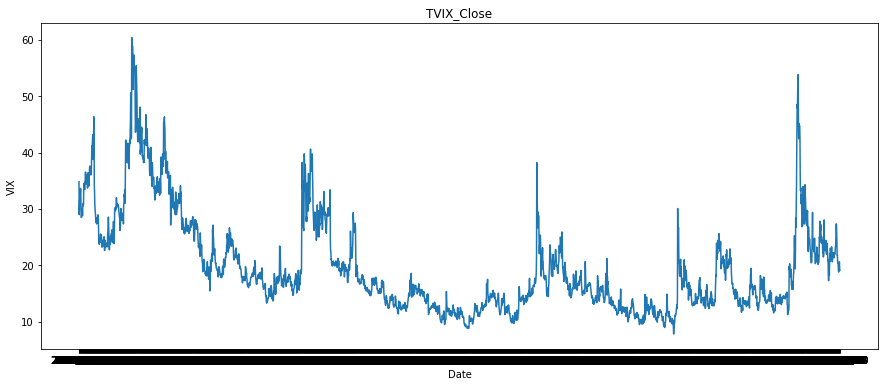

In [11]:
plt.figure(figsize=(15,6))
plt.plot(data1["TVIX_Close"])
plt.title("TVIX_Close")
plt.xlabel("Date")
plt.ylabel("VIX")
plt.show()

 Descriptive Statistics

In [12]:
def descriptive_statistics(x) : 
    return pd.Series([x.count(),x.min(),x.quantile(.25),x.median(),
                      x.quantile(.75),x.max(),x.mean(),x.var(),
                      x.std(),x.skew(),x.kurt(),stats.jarque_bera(x)],index=['count','min','25%',
                    'median','75%','max','mean','var','std','skewness',"kurtosis","JB"])

In [13]:
descriptive_statistics_result = pd.DataFrame(data2, columns=["TVIX_Close","d_TVIX_Close",'CallATM0NextF_Close','d_CallATM0NextF_Close'])
descriptive_statistics_result.apply(descriptive_statistics)

D:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1847: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


,TVIX_Close,d_TVIX_Close,CallATM0NextF_Close,d_CallATM0NextF_Close
count,2829,2828,2829,2828
min,7.82,-0.365945,0.0208593,-1.42326
25%,13.52,-0.0299474,0.105426,-0.0550509
median,17.12,-0.00267068,0.136677,0.00073669
75%,23.79,0.0262733,0.181324,0.0523882
max,60.41,0.750286,0.685542,1.21214
mean,19.8323,-0.000211787,0.159425,-0.000340869
var,74.8367,0.00380072,0.00668736,0.018588
std,8.65082,0.06165,0.0817763,0.136338
skewness,1.44852,1.33525,1.57679,0.022661


Unit Root Test

In [17]:
print(ADF(data1["CallATM0CloseF_Close"]).summary())
print(PhillipsPerron(data1["CallATM0CloseF_Close"]).summary())
print(KPSS(data1["CallATM0CloseF_Close"]).summary())
print("----------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------")
print(ADF(data1["d_CallATM0CloseF_Close"].dropna()).summary())
print(PhillipsPerron(data1["d_CallATM0CloseF_Close"].dropna()).summary())
print(KPSS(data1["d_CallATM0CloseF_Close"].dropna()).summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.760
P-value                         0.003
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -9.579
P-value                         0.000
Lags                               29
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  3.862
P-value                         0.000
Lags                               31
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null 

In [18]:
print(ADF(data1["CallATM0CloseF_Close"]).pvalue)
print(PhillipsPerron(data1["CallATM0CloseF_Close"]).pvalue)
print(KPSS(data1["CallATM0CloseF_Close"]).pvalue)
print("----------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------")
print(ADF(data1["d_CallATM0CloseF_Close"].dropna()).pvalue)
print(PhillipsPerron(data1["d_CallATM0CloseF_Close"].dropna()).pvalue)
print(KPSS(data1["d_CallATM0CloseF_Close"].dropna()).pvalue)

0.0033401968706059985
2.1828519388503245e-16
0.0001
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
6.103309817787638e-28
0.0
0.9579866225559741


Cointegration

In [19]:
st.coint(data1["TVIX_Close"][1:].dropna(),data1["d_CallATM0CloseF_Close"].dropna())

(-3.653793523777044,
 0.020986386831468595,
 array([-3.90005934, -3.33814794, -3.04585049]))

In [37]:
help(st.coint)

Help on function coint in module statsmodels.tsa.stattools:

coint(y0, y1, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)
    Test for no-cointegration of a univariate equation.
    
    The null hypothesis is no cointegration. Variables in y0 and y1 are
    assumed to be integrated of order 1, I(1).
    
    This uses the augmented Engle-Granger two-step cointegration test.
    Constant or trend is included in 1st stage regression, i.e. in
    cointegrating equation.
    
    **Warning:** The autolag default has changed compared to statsmodels 0.8.
    In 0.8 autolag was always None, no the keyword is used and defaults to
    "aic". Use `autolag=None` to avoid the lag search.
    
    Parameters
    ----------
    y0 : array_like
        The first element in cointegrated system. Must be 1-d.
    y1 : array_like
        The remaining elements in cointegrated system.
    trend : str {"c", "ct"}
        The trend term included in regression for cointegrating eq

In [20]:
#TVIX_seq, CIV_seq = seq(TVIX_data), seq(CIV_data)

In [36]:
print(order_CIV_Close)

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 7, BIC -> 4, FPE -> 7, HQIC -> 7>


In [14]:
data1

,TVIX_Close,CallATM0CloseF_Close,d_CallATM0CloseF_Close,d_TVIX_Close
Date,,,,
2007/12/18,34.82,0.377382,NaN,NaN
2007/12/19,28.98,0.339749,-0.105051,-0.183586
2007/12/20,31.17,0.343128,0.009896,0.072850
2007/12/21,31.88,0.361869,0.053180,0.022523
2007/12/24,32.84,0.355039,-0.019056,0.029668
...,...,...,...,...
2020/11/16,19.31,0.148104,0.004926,0.026766
2020/11/17,19.86,0.170082,0.138370,0.028085
2020/11/18,20.61,0.143893,-0.167212,0.037069


VAR

In [15]:
type(data1)

pandas.core.frame.DataFrame

In [18]:
help(data_CIV_Close)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index: Union[Collection, NoneType] = None, columns: Union[Collection, NoneType] = None, dtype: Union[str, numpy.dtype, ForwardRef('ExtensionDtype'), NoneType] = None, copy: bool = False)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects.
 |  
 |      .. versionchanged:: 0.23.0
 |         If data is a dict, column order follows insertion-order for
 |         Python 3.6 and later.
 |  
 |      .. versionchanged:: 0.25.

In [ ]:
data_CIV_Close

In [29]:
model_fitted_CIV_Close.__dir__()

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bmat_forc_cov',
 '_cache',
 '_char_mat',
 '_chol_sigma_u',
 '_cov_alpha',
 '_cov_sigma',
 '_forecast_vars',
 '_model_type',
 '_omega_forc_cov',
 '_zz',
 'acf',
 'acorr',
 'aic',
 'bic',
 'bse',
 'coefs',
 'coefs_exog',
 'cov_params',
 'cov_ybar',
 'dates',
 'detomega',
 'df_model',
 'df_resid',
 'endog',
 'endog_lagged',
 'exog',
 'exog_names',
 'fevd',
 'fittedvalues',
 'forecast',
 'forecast_cov',
 'forecast_interval',
 'fpe',
 'get_eq_index',
 'hqic',
 'info_criteria',
 'intercept',
 'intercept_longrun',
 'irf',
 'irf_errband_mc',
 'irf_resim',
 'is_stable',
 'k_ar',
 'k_exog',
 'k_exog_user',
 'k_trend',
 'llf',
 'l

In [109]:
print(model_fitted_CIV_Close.pvalues) #上下第四行
type(model_fitted_CIV_Close.pvalues)

                           d_TVIX_Close  d_CallATM0CloseF_Close
const                          0.846839            9.006184e-01
L1.d_TVIX_Close                0.000357            1.996842e-22
L1.d_CallATM0CloseF_Close      0.735138           3.097984e-106
L2.d_TVIX_Close                0.000030            8.935965e-02
L2.d_CallATM0CloseF_Close      0.149293            7.919774e-37
L3.d_TVIX_Close                0.003779            2.154646e-01
L3.d_CallATM0CloseF_Close      0.839601            9.980306e-29
L4.d_TVIX_Close                0.104142            1.234203e-01
L4.d_CallATM0CloseF_Close      0.507730            3.380577e-13


pandas.core.frame.DataFrame

In [121]:
a=model_fitted_CIV_Close.pvalues
a['d_TVIX_Close']

const                        0.846839
L1.d_TVIX_Close              0.000357
L1.d_CallATM0CloseF_Close    0.735138
L2.d_TVIX_Close              0.000030
L2.d_CallATM0CloseF_Close    0.149293
L3.d_TVIX_Close              0.003779
L3.d_CallATM0CloseF_Close    0.839601
L4.d_TVIX_Close              0.104142
L4.d_CallATM0CloseF_Close    0.507730
Name: d_TVIX_Close, dtype: float64

In [116]:
a["d_TVIX_Close"] <0.05

const                        False
L1.d_TVIX_Close               True
L1.d_CallATM0CloseF_Close    False
L2.d_TVIX_Close               True
L2.d_CallATM0CloseF_Close    False
L3.d_TVIX_Close               True
L3.d_CallATM0CloseF_Close    False
L4.d_TVIX_Close              False
L4.d_CallATM0CloseF_Close    False
Name: d_TVIX_Close, dtype: bool

In [120]:
type(model_fitted_CIV_Close.summary())

statsmodels.tsa.vector_ar.output.VARSummary

In [119]:
print(model_fitted_CIV_Close.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Mar, 2021
Time:                     15:11:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -9.18220
Nobs:                     3026.00    HQIC:                  -9.20512
Log likelihood:           5377.39    FPE:                9.92388e-05
AIC:                     -9.21798    Det(Omega_mle):     9.86511e-05
--------------------------------------------------------------------
Results for equation d_TVIX_Close
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                            -0.000210         0.001087           -0.193           0.847
L1.d_TVIX_Close                  -0.068301         0.019133           -3.570           0.000
L1.d_

In [100]:
print(model_fitted_CIV_Close.params)#上下第一行
print(model_fitted_CIV_Close.stderr) #上下第二行
print(model_fitted_CIV_Close.tvalues) #上下第三行
print(model_fitted_CIV_Close.pvalues) #上下第四行

#print(model_fitted_CIV_Close.coefs_exog)#上下第一行第一列
#print(model_fitted_CIV_Close.coefs) #上下第一行第n列 先lag後上下

                           d_TVIX_Close  d_CallATM0CloseF_Close
const                         -0.000210               -0.000397
L1.d_TVIX_Close               -0.068301                0.544771
L1.d_CallATM0CloseF_Close     -0.002196               -0.415369
L2.d_TVIX_Close               -0.081377                0.096869
L2.d_CallATM0CloseF_Close      0.009915               -0.254752
L3.d_TVIX_Close               -0.056310                0.070394
L3.d_CallATM0CloseF_Close      0.001390               -0.223267
L4.d_TVIX_Close               -0.031301                0.086728
L4.d_CallATM0CloseF_Close      0.004286               -0.137637
                           d_TVIX_Close  d_CallATM0CloseF_Close
const                          0.001087                0.003178
L1.d_TVIX_Close                0.019133                0.055920
L1.d_CallATM0CloseF_Close      0.006492                0.018974
L2.d_TVIX_Close                0.019510                0.057023
L2.d_CallATM0CloseF_Close      0.006875 

In [17]:
tmp = data1['d_TVIX_Close'][1:].dropna(),data1['d_CallATM0CloseF_Close'][1:].dropna()
data_CIV_Close = pd.DataFrame(tmp)
data_CIV_Close = data_CIV_Close.T
print(data_CIV_Close)

model_CIV_Close = VAR(data_CIV_Close)
order_CIV_Close = model_CIV_Close.select_order(maxlags=10)
print(order_CIV_Close.summary())

model_fitted_CIV_Close = model_CIV_Close.fit(4) #fit要設BIC*
model_fitted_CIV_Close.summary()


            d_TVIX_Close  d_CallATM0CloseF_Close
Date                                            
2007/12/19     -0.183586               -0.105051
2007/12/20      0.072850                0.009896
2007/12/21      0.022523                0.053180
2007/12/24      0.029668               -0.019056
2007/12/25     -0.008870               -0.043242
...                  ...                     ...
2020/11/16      0.026766                0.004926
2020/11/17      0.028085                0.138370
2020/11/18      0.037069               -0.167212
2020/11/19     -0.056902                0.158545
2020/11/20     -0.017617               -0.021013

[3030 rows x 2 columns]


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -9.025      -9.021   0.0001204      -9.024
1       -9.134      -9.122   0.0001080      -9.129
2       -9.167      -9.147   0.0001045      -9.160
3       -9.197      -9.169   0.0001013      -9.187
4       -9.216     -9.180*   9.944e-05      -9.203
5       -9.220      -9.176   9.908e-05      -9.204
6       -9.222      -9.170   9.886e-05      -9.203
7      -9.226*      -9.167  9.842e-05*     -9.205*
8       -9.225      -9.157   9.858e-05      -9.200
9       -9.224      -9.148   9.868e-05      -9.196
10      -9.223      -9.139   9.879e-05      -9.192
--------------------------------------------------


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Mar, 2021
Time:                     10:10:08
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -9.18220
Nobs:                     3026.00    HQIC:                  -9.20512
Log likelihood:           5377.39    FPE:                9.92388e-05
AIC:                     -9.21798    Det(Omega_mle):     9.86511e-05
--------------------------------------------------------------------
Results for equation d_TVIX_Close
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                            -0.000210         0.001087           -0.193           0.847
L1.d_TVIX_Close                  -0.068301         0.019133           -3.570           0.000
L1.d_

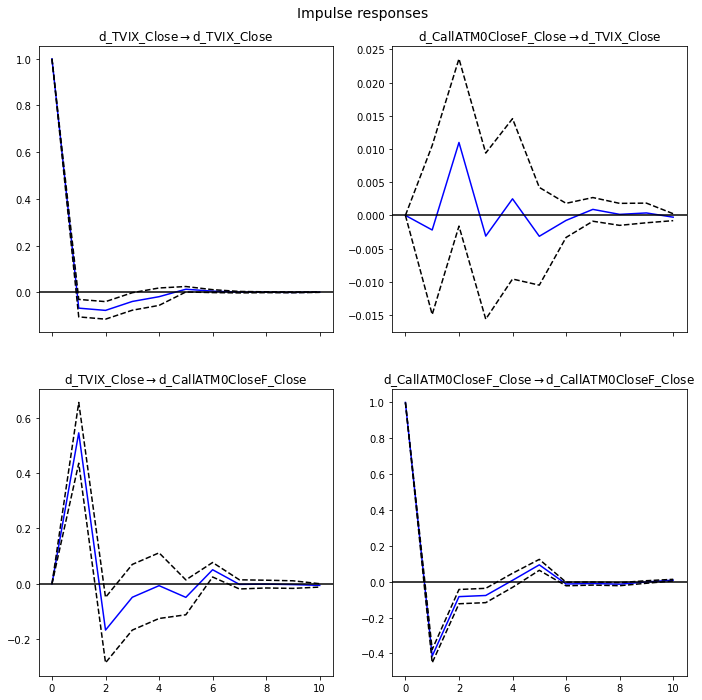

In [62]:
irf_CIV_Close = model_fitted_CIV_Close.irf(10).plot(orth=False)

model_fitted_CIV_Close

Granger Causality

In [67]:
print(model_fitted_CIV_Close.test_causality("d_TVIX_Close",("d_CallATM0CloseF_Close")))
print(model_fitted_CIV_Close.test_causality("d_CallATM0CloseF_Close",("d_TVIX_Close")))
print(model_fitted_CIV_Close.test_causality("d_TVIX_Close",("d_CallATM0CloseF_Close")).test_statistic)
print(model_fitted_CIV_Close.test_causality("d_CallATM0CloseF_Close",("d_TVIX_Close")).test_statistic)


<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: d_CallATM0CloseF_Close does not Granger-cause d_TVIX_Close: fail to reject at 5% significance level. Test statistic: 0.844, critical value: 2.373>, p-value: 0.497>
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: d_TVIX_Close does not Granger-cause d_CallATM0CloseF_Close: reject at 5% significance level. Test statistic: 24.050, critical value: 2.373>, p-value: 0.000>
0.8438125487769755
24.050453768306454


Forecast Error Variance Decomposition

In [35]:
fevd_CIV_Close.summary()

FEVD for d_TVIX_Close
     d_TVIX_Close  d_CallATM0CloseF_Close
0        1.000000                0.000000
1        0.999963                0.000037
2        0.999044                0.000956
3        0.998972                0.001028
4        0.998925                0.001075
5        0.998850                0.001150
6        0.998846                0.001154
7        0.998840                0.001160
8        0.998840                0.001160
9        0.998839                0.001161

FEVD for d_CallATM0CloseF_Close
     d_TVIX_Close  d_CallATM0CloseF_Close
0        0.097877                0.902123
1        0.087211                0.912789
2        0.092122                0.907878
3        0.092974                0.907026
4        0.092970                0.907030
5        0.092471                0.907529
6        0.092596                0.907404
7        0.092600                0.907400
8        0.092603                0.907397
9        0.092604                0.907396




FEVD for d_TVIX_Close
     d_TVIX_Close  d_CallATM0CloseF_Close
0        1.000000                0.000000
1        0.999963                0.000037
2        0.999044                0.000956
3        0.998972                0.001028
4        0.998925                0.001075
5        0.998850                0.001150
6        0.998846                0.001154
7        0.998840                0.001160
8        0.998840                0.001160
9        0.998839                0.001161

FEVD for d_CallATM0CloseF_Close
     d_TVIX_Close  d_CallATM0CloseF_Close
0        0.097877                0.902123
1        0.087211                0.912789
2        0.092122                0.907878
3        0.092974                0.907026
4        0.092970                0.907030
5        0.092471                0.907529
6        0.092596                0.907404
7        0.092600                0.907400
8        0.092603                0.907397
9        0.092604                0.907396


None
Figure(720x720

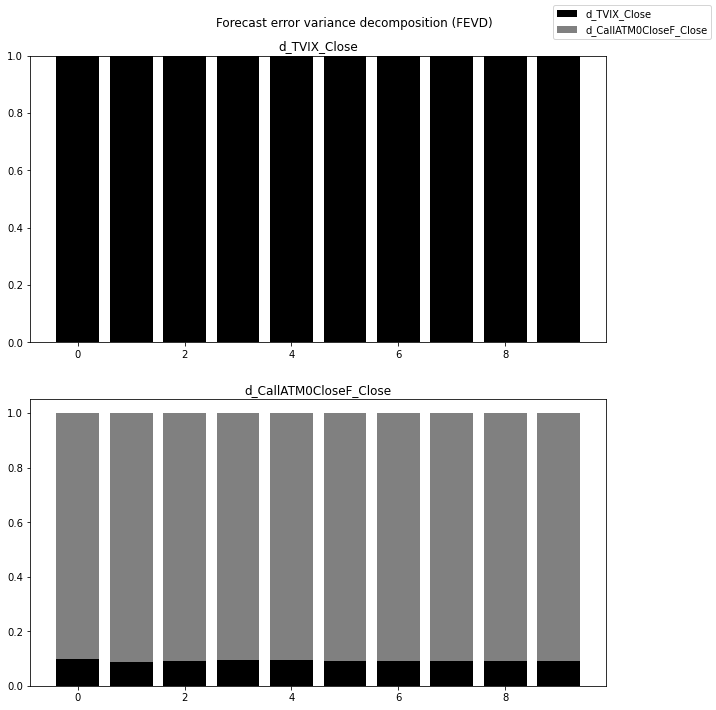

In [33]:
fevd_CIV_Close = model_fitted_CIV_Close.fevd(10)
print(fevd_CIV_Close.summary())
print(fevd_CIV_Close.plot())

In [8]:
a=2.717
b=np.log(a)
b

0.9995283304442107